# Random Walk Generation

In [2]:
import numpy as np
import pandas as pd

In [13]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    '''
    Evolution of a stock price using a Geometric Brownian Motion model.
    '''
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [17]:
p = gbm(n_years=10, n_scenarios=3)

In [18]:
p.head()

,0,1,2
0,100.884770,91.630802,95.410759
1,104.760907,85.395707,101.106933
2,102.988465,82.819116,92.042526
3,104.977892,82.817188,93.751004
4,97.656682,80.602329,101.797933


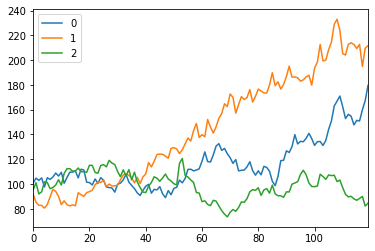

In [19]:
p.plot()

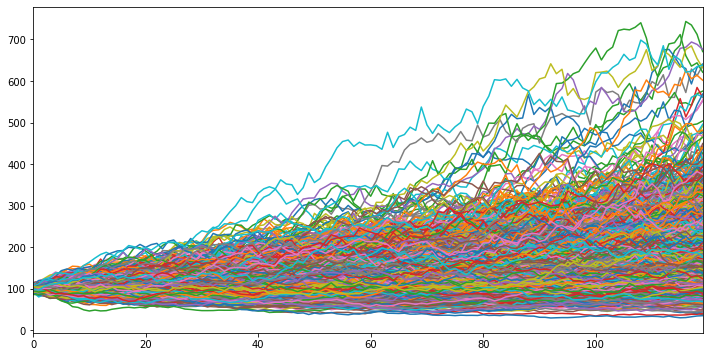

In [21]:
# more scenarios
gbm(n_years=10, n_scenarios=1000).plot(figsize=(12, 6), legend=False)

In [22]:
# make it faster
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    '''
    Evolution of a stock price using a Geometric Brownian Motion model.
    '''
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices


def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    '''
    Evolution of a stock price using a Geometric Brownian Motion model.
    '''
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    # to prices
    prices = s_0*pd.DataFrame((rets_plus_1).cumprod())
    return prices

In [23]:
%timeit gbm0(n_years=5, n_scenarios=1000)

432 ms ± 6.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%timeit gbm1(n_years=5, n_scenarios=1000)

2.53 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
# use faster one as gbm and start at assigned price
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    '''
    Evolution of a stock price using a Geometric Brownian Motion model.
    '''
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

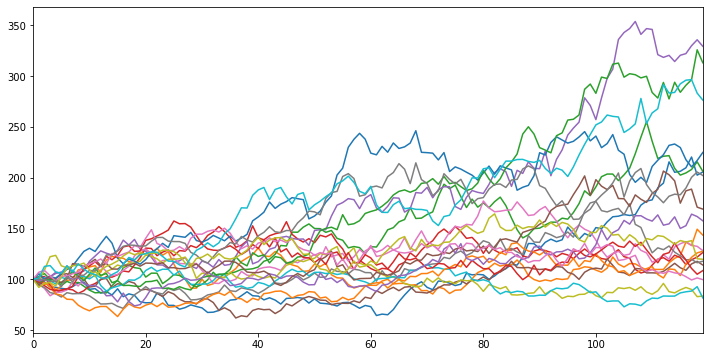

In [36]:
gbm(n_years=10, n_scenarios=20).plot(figsize=(12, 6), legend=False)